# Assignment 4, Part B: Optimisation

(-0.027240478992462167,
 2.0027856469154357,
 -0.010141533613204967,
 1.9828997075557708)

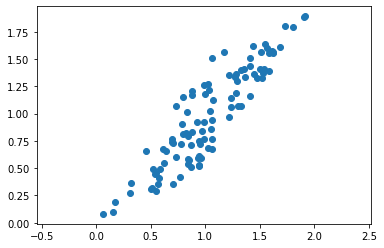

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
# make up some data for x
D = 2
x= torch.rand(100,D)
x[:,0] = x[:,0] + x[:,1]
x[:,1] = 0.5*x[:,0] + x[:,1]

plt.scatter(x[:,0],x[:,1])
plt.axis('equal')

In [2]:
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)
# origWeight = torch.clone(wEncoder)

#### The function of encoder and decoder

In [3]:
def func(wEncoder, wDecoder, bEncoder, bDecoder):
    x_reconstruction = torch.zeros(100,D)
    z = x[:, 0]*wEncoder[0,0]+x[:,1]*wEncoder[1,0]+bEncoder
    x_reconstruction[:,0]=z*wDecoder[0,0]+bDecoder[0,0]
    x_reconstruction[:,1]=z*wDecoder[0,1]+bDecoder[0,1]
    return x_reconstruction    

#### Plot show the reconstructed X

(2.1406979084014894,
 3.986225652694702,
 0.25022481232881544,
 0.5388421282172203)

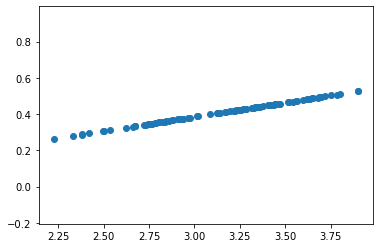

In [4]:
x.autograd_grad = True
x.grad
y = func(wEncoder, wDecoder, bEncoder, bDecoder)
plt.scatter(y.detach()[:,0],y.detach()[:,1])
plt.axis('equal')

In [5]:
# call the loss function and optimize with stochastic gradient descent SGD
loss = torch.nn.MSELoss()
opt = torch.optim.SGD([wEncoder, wDecoder, bEncoder, bDecoder],lr = 0.01) #momentum=0.9

In [6]:
# The function of optimize with 1000 steps
STEPS = 1000
saved_wE = np.ones((STEPS,D,1))
saved_wD = np.ones((STEPS,1,D))
saved_bE = np.ones((STEPS,1))
saved_bD = np.ones((STEPS,1,D))
loss_cure = np.ones((STEPS,1))
                 
for t in range(STEPS):
    saved_wE[t,:,:] = wEncoder.detach().numpy()
    saved_wD[t,:,:] = wDecoder.detach().numpy()
    saved_bE[t,:] = bEncoder.detach().numpy()
    saved_bD[t,:,:] = bDecoder.detach().numpy()
    opt.zero_grad()
    xr = func(wEncoder, wDecoder, bEncoder, bDecoder)
    output = loss(x, xr)
    loss_cure[t,:] = output.detach().numpy()
    output.backward(torch.ones_like(output))
    opt.step()

####  Plot the loss versus epochs

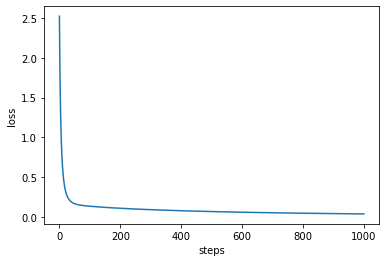

In [7]:
loss_cure
plt.plot(loss_cure)
plt.xlabel('steps')
plt.ylabel('loss')
plt.show()

#### Plot original data X, reconstructed X, and encoder weights.

(-1.9575692474842072,
 2.094706064462662,
 -0.0946153461933136,
 1.9869222700595857)

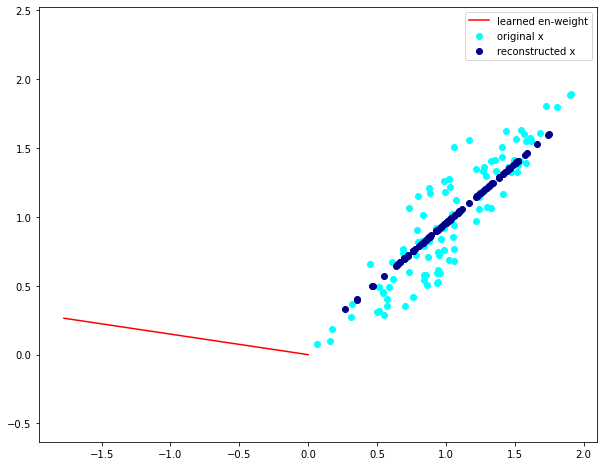

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(x.detach()[:,0],x.detach()[:,1],color='cyan', label='original x')
plt.scatter(xr.detach()[:,0],xr.detach()[:,1], label='reconstructed x', color = 'darkblue')
plt.plot([0,wEncoder[0,0]], [0,wEncoder[1,0]],'-r', label='learned en-weight')
#plt.plot([origWeight[0,0],wEncoder[0,0]], [origWeight[1,0],wEncoder[1,0]],'-g' )
#plt.plot([0,saved_wE[-1,0,0]],[0,saved_wE[-1,1,0]],'.',color='darkred',label='learned wE')
plt.legend()
plt.axis('equal')

#### Print out the ratio of the weight in the encoder versus the weight in the decoder, for each of the two dimensions.

In [9]:
print('The ratio of the weight in x[0]: ',wEncoder.detach()[0,0]/wDecoder.detach()[0,0])
print('The ratio of the weight in x[1]: ',wEncoder.detach()[1,0]/wDecoder.detach()[0,1])

The ratio of the weight in x[0]:  tensor(3.3471)
The ratio of the weight in x[1]:  tensor(-0.5804)


The ratio of the weight in two dimensions which are very different. 

#### Show the learnd Encoder & Decoder weight and Bias.

(-1.9573762357234954,
 2.0946968734264373,
 -1.638621437549591,
 2.0604463696479796)

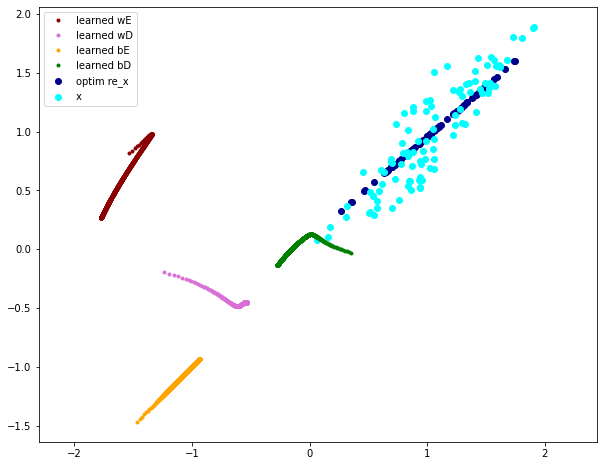

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(xr.detach()[:,0],xr.detach()[:,1], label='optim re_x', color = 'darkblue')
plt.scatter(x.detach()[:,0],x.detach()[:,1],color='cyan', label='x')
plt.plot(saved_wE[:,0,0],saved_wE[:,1,0],'.',color='darkred',label='learned wE')
plt.plot(saved_wD[:,0,0],saved_wD[:,0,1],'.',color='orchid',label='learned wD')
plt.plot(saved_bE[:,0],saved_bE[:,0],'.',color='orange',label='learned bE')
plt.plot(saved_bD[:,0,0],saved_bD[:,0,1],'.',color='g',label='learned bD')
plt.legend()
plt.axis('equal')

#### Add momentum = 0.9, from a random start

In [11]:
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)
loss = torch.nn.MSELoss()
opt = torch.optim.SGD([wEncoder, wDecoder, bEncoder, bDecoder],lr = 0.01, momentum=0.9) #momentum=0.9
STEPS = 1000                
for t in range(STEPS):
    opt.zero_grad()
    xr = func(wEncoder, wDecoder, bEncoder, bDecoder)
    output = loss(x, xr)
    loss_cure[t,:] = output.detach().numpy()
    output.backward(torch.ones_like(output))
    opt.step()

Plot the loss versus epochs (steps).

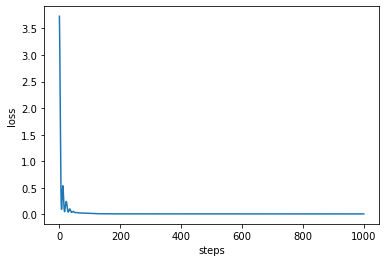

In [12]:
loss_cure
plt.plot(loss_cure)
plt.xlabel('steps')
plt.ylabel('loss')
plt.show()

Plot original data X, reconstructed X, and encoder weights.

(-0.865982910990715,
 2.0427257627248765,
 -1.5085985243320466,
 2.0876520454883574)

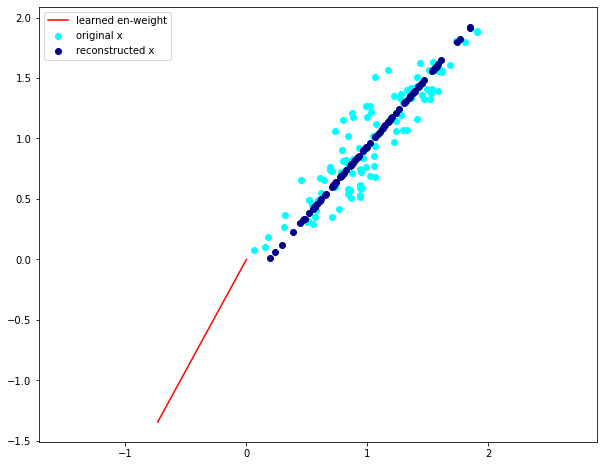

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(x.detach()[:,0],x.detach()[:,1],color='cyan', label='original x')
plt.scatter(xr.detach()[:,0],xr.detach()[:,1], label='reconstructed x', color = 'darkblue')
plt.plot([0,wEncoder[0,0]], [0,wEncoder[1,0]],'-r', label='learned en-weight')
plt.legend()
plt.axis('equal')

Print out the ratio of the weight in the encoder versus the weight in the decoder, for each of the two dimensions.

In [14]:
print('The ratio of the weight in x[0]: ',wEncoder.detach()[0,0]/wDecoder.detach()[0,0])
print('The ratio of the weight in x[1]: ',wEncoder.detach()[1,0]/wDecoder.detach()[0,1])

The ratio of the weight in x[0]:  tensor(1.6805)
The ratio of the weight in x[1]:  tensor(2.6628)


As we see above the plot, the tendency of x and reconstructed x which are match each other. It is going to same direction. By contrast, the SGD optimazer without momentum which still have angle different by original x and reconstructed x. The loss value show little bit difference as there are some fluctuate. It meants the momentun is working which will turn out the local minima. Also the weight value direction same with both x tendency. The ratio of the weight on each demensions which are more close than privious one. SGD with momentum will have more accuracy of econder. 

#### RMSprop (with momentum 0.9 and a random start) 

In [15]:
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)
opt = torch.optim.RMSprop([wEncoder, wDecoder, bEncoder, bDecoder],momentum=0.9,lr = 0.01) 
STEPS = 1000
for t in range(STEPS):
    opt.zero_grad()
    xr = func(wEncoder, wDecoder, bEncoder, bDecoder)
    output = loss(x, xr)
    loss_cure[t,:] = output.detach().numpy()
    output.backward(torch.ones_like(output))
    opt.step()

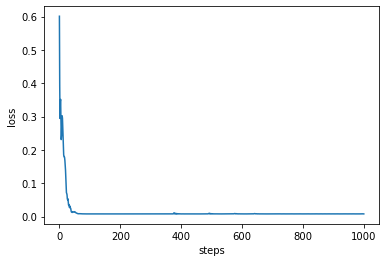

In [16]:
# Plot the loss versus epochs (steps).
loss_cure
plt.plot(loss_cure)
plt.xlabel('steps')
plt.ylabel('loss')
plt.show()

(-0.09552558660507203,
 2.0060373187065124,
 -0.10491974353790284,
 2.012538504600525)

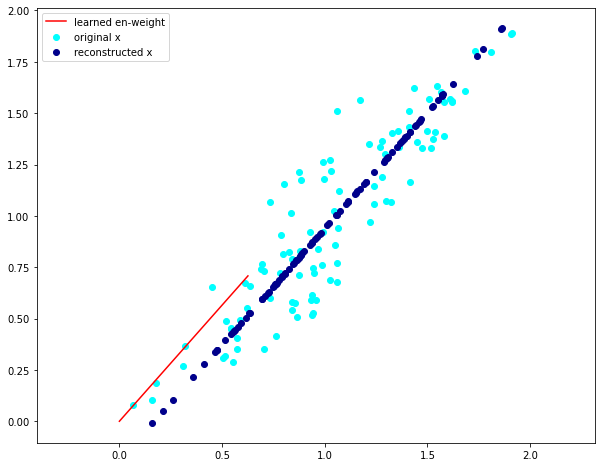

In [17]:
# Plot original data X, reconstructed X, and encoder weights.
plt.figure(figsize=(10,8))
plt.scatter(x.detach()[:,0],x.detach()[:,1],color='cyan', label='original x')
plt.scatter(xr.detach()[:,0],xr.detach()[:,1], label='reconstructed x', color = 'darkblue')
plt.plot([0,wEncoder[0,0]], [0,wEncoder[1,0]],'-r', label='learned en-weight')
plt.legend()
plt.axis('equal')

Print out the ratio of the weight in the encoder versus the weight in the decoder, for each of the two dimensions.

In [18]:
print('The ratio of the weight in x[0]: ',wEncoder.detach()[0,0]/wDecoder.detach()[0,0])
print('The ratio of the weight in x[1]: ',wEncoder.detach()[1,0]/wDecoder.detach()[0,1])

The ratio of the weight in x[0]:  tensor(0.8856)
The ratio of the weight in x[1]:  tensor(0.8864)


There is different between RMSprop and SGD. The obviously difference is that weight polt line going to different direction. The weight of encoder in SGD is positive value which is from origin go up and RMSprop is from origin go down to negitive value. The RMSprop can avoid stuck the saddle point when it scales the learning rate with gradient. The ratio of the weight on each demensions which are the nearly equal. So it has same results with SGD had momentum but it can be more fast and get more accuracy. 

#### Explain the relationship between the above autoencoder and PCA.

Those Autoencoder algorithms with Principal component analysis PCA are both unsupervised machine learning technique. As we see above our process is to encoder two dimensional data to one dimensional and decoder to two dimensional vector again. However, PCA usually for reduce the number of features which is preparing for improving performance of machine learning model whatever classification, regression, or clustering. Our autoencoder algorithms didn’t reduce the dimension of data which only seems rescaled the data. 

The two methods have different encoder algorithms. Principal component analysis PCA through the covariance matrix to find the Eigen Vector. Then use Z-Score from Eigen Vector to project the new dimension data. The Autoencoder is using optimizer SGD by find the zero Loss function value to get the enhanced encoder weights.  PCA is mainly implemented non-parametric statistical techniques to transforms the data. The Autoencoder is focus on the machine learning algorithm Gradient Descent optimization to find the objective. 

The similarities of those two techniques are both rely on linear model. And they both base on reduction tends to minimize the information loss. Both can be implemented for filter noisy datasets. 


#### In the notebook with the Week 9 tutorial, you may have noticed how the RMSprop and Adam optimisers seem to prefer travelling along diagonal lines. Why does this happen?


The optimizer technique is use to minimize the loss or increase the accuracy. The local minima and global minima is the issue of the optimizer algorithms. We using momentum can avoid getting stuck in the local minima. For example, in this autoencoder programming above, we implemented the momentum =0.9 in SGD which give us very good result. 
However, the gradient descent update the parameters with:

W = W - learning rate * Vdw

b  =  b  - learning rate * Vdb

The RMSprop algorithm technique update parameters in different way which the movement in direction of weights ‘W’ is more than the movement in direction of ‘b’. They take the ‘S’ which is the exponential average of gradients. The every step the change will divide the gradients by the roots of exponential average respectively. 

W = W - learning rate * dw/ sqrt(Sdw)

b  =  b - learning rate * dw/ sqrt(Sdb)

The Adam algorithm is not only take the benefits of RMSprop, and also take part of Adaptive Gradient Algorithm AdaGrad. It calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of the moving averages. 

That makes the RMSprop and Adam take more large steps in horizontal direction and converge faster. 

This the reason the RMSprop and Adam optimisers are likely to prefer travelling along diagonal lines. As they can easy avoid stuck local minima and handle gradients noisy problems. 


#### Reference:

1. Harsha Goonewardana, PCA: Application in Machine Learning. https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db
2. Iqbal Hussain, Principal Component Analysis (PCA) in Machine Learning— You will never find it tough again. https://medium.com/codex/principal-component-analysis-pca-how-it-works-mathematically-d5de4c7138e6
3.  Jason Brownlee, Gentle Introduction to the Adam Optimization Algorithm for Deep Learning, https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/